In [25]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 


In [26]:
data = {
    "Years_of_Experience": [1,2,3,4,5,6,7,8,9,10],
    "Salary":[35000,37000,42000,50000,55000,61000,67000,72000,78000,83000]

}
df = pd.DataFrame(data)
print(df)

   Years_of_Experience  Salary
0                    1   35000
1                    2   37000
2                    3   42000
3                    4   50000
4                    5   55000
5                    6   61000
6                    7   67000
7                    8   72000
8                    9   78000
9                   10   83000


In [27]:
X = df.drop("Salary", axis=1)
y= df["Salary"]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state= 42)

print("X_train shape::",X_train)
print("X_test shape:",X_test)
print("y_train shape:",y_train)
print("y_test shape:",y_test)

X_train shape::    Years_of_Experience
2                    3
9                   10
4                    5
3                    4
6                    7
X_test shape:    Years_of_Experience
8                    9
1                    2
5                    6
0                    1
7                    8
y_train shape: 2    42000
9    83000
4    55000
3    50000
6    67000
Name: Salary, dtype: int64
y_test shape: 8    78000
1    37000
5    61000
0    35000
7    72000
Name: Salary, dtype: int64


### Underfit

In [28]:
model_depth1 = DecisionTreeRegressor(max_depth=1)
model_depth1.fit(X_train,y_train)

test_predict = model_depth1.predict(X_test)

print("Predicted salary:", test_predict)
print("Actual salary:", y_test.values)



Predicted salary: [75000. 49000. 49000. 49000. 75000.]
Actual salary: [78000 37000 61000 35000 72000]


### OverFit

In [31]:
model_depth2 = DecisionTreeRegressor(max_depth=10)
model_depth2.fit(X_train,y_train)

y_pred2= model_depth2.predict(X_test)
print("Predicted Salary:",y_pred2)
print("Acutual Salary:",y_test.values)


Predicted Salary: [83000. 42000. 55000. 42000. 67000.]
Acutual Salary: [78000 37000 61000 35000 72000]


### compeare

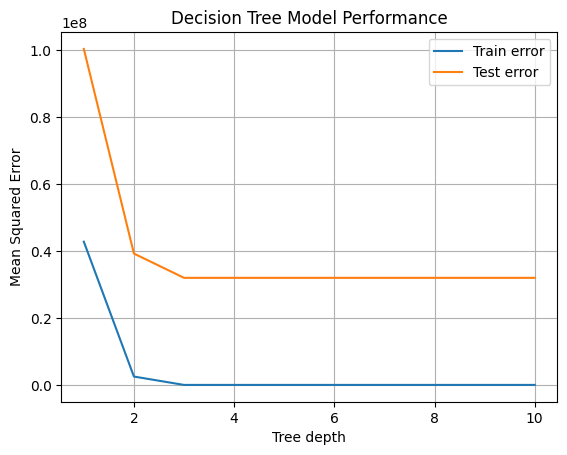

In [37]:
depths = list(range(1, 11))
train_errors = []
test_errors = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.plot(depths, train_errors, label="Train error")
plt.plot(depths, test_errors, label="Test error")
plt.xlabel("Tree depth")
plt.ylabel("Mean Squared Error")
plt.title("Decision Tree Model Performance")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
best_depth = depths[np.argmin(test_errors)]
print("\n Best depth:", best_depth)


 Best depth: 3


#### Q8. What is underfiting
